In [1]:
from methods import *
import numpy as np
import matplotlib.pyplot as plt
from algorithm import factorize
from param_tools import r_surface

PML algorithm, aspect ratio 1 x 6
[==========          ] 50%
Manifolds...
Manifold #1 [ 1  2  3  4  5  6 11]
Manifold #2 [7]
Independent coordinate selection, aspect ratio 1 x 6


  0%|          | 0/18 [00:00<?, ?it/s]

[==========          ] 50%
Manifolds...
Manifold #1 [ 1  2  3  4  5  6 11]
Manifold #2 [7]
[[1, 3, 5, 4, 2, 6, 11], [7]]
PML algorithm, aspect ratio 1 x 7
[==========          ] 50%
Manifolds...
Manifold #1 [ 1  3  4  5  6  7 12]
Manifold #2 [2 8]
Independent coordinate selection, aspect ratio 1 x 7


  0%|          | 0/18 [00:00<?, ?it/s]

[==========          ] 50%
Manifolds...
Manifold #1 [ 1  3  4  5  6  7 12]
Manifold #2 [2 8]
[[1, 5, 4, 6, 7, 12], [8, 2]]
PML algorithm, aspect ratio 1 x 8
[==========          ] 50%
Manifolds...
Manifold #1 [1 3 4 5 6 7]
Manifold #2 [2 9]
Independent coordinate selection, aspect ratio 1 x 8


  0%|          | 0/18 [00:00<?, ?it/s]

[==========          ] 50%
Manifolds...
Manifold #1 [1 3 4 5 6 7]
Manifold #2 [2 9]
[[1, 5, 7, 4, 6], [9, 2]]


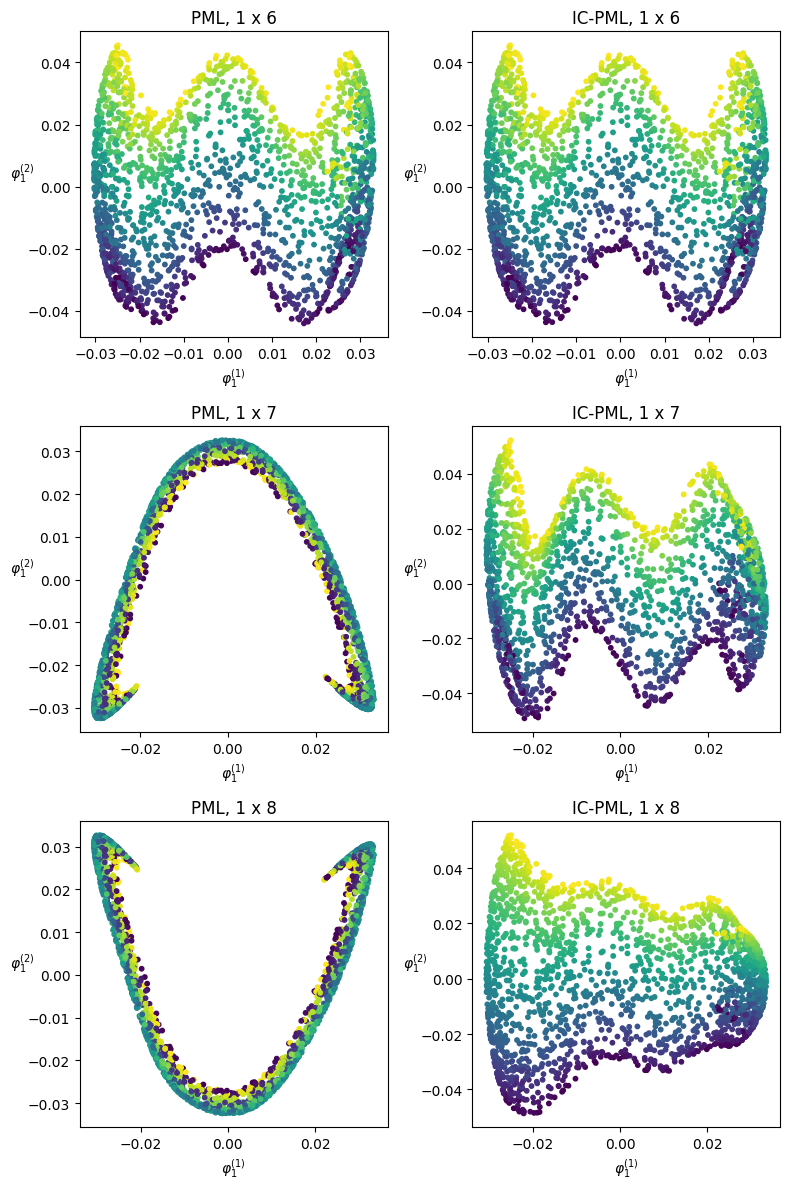

In [2]:
n = 3
scale_rate = 1
plot, axes = plt.subplots(n,2, figsize=(8,4*n))
for i in range(n):
    samples = sample_strip(2000, ratio=[1,6+i*scale_rate])
    print("PML algorithm, aspect ratio 1 x " + str(6+i*scale_rate))
    fact_results = factorize(samples, sigma=0.5, n_factors = 2,
        sim_crit=0.6, eig_crit=1.0, n_eigenvectors=20)
    print("Independent coordinate selection, aspect ratio 1 x " + str(6+i*scale_rate))
    ind_results, ind_manifolds, ind_coords = ic_pml(samples, dim = 2, sigma = 0.5,
        zeta=0.01, sim_crit=0.6, eig_crit=1.0, n_eigenvectors=20, n_coords=20, n_ind_coords=20)
    axes[i][0].scatter(
        fact_results["phi"][:, fact_results["manifolds"][0][0]],
        fact_results["phi"][:, fact_results["manifolds"][1][0]],
        c=samples[:,0], s=10)
    axes[i][0].set_title('PML, 1 x ' + str(6+i*scale_rate), wrap=True)
    axes[i][0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
    axes[i][0].set_ylabel(r'$\varphi_1^{(2)}$', rotation=0)
    axes[i][1].scatter(
        ind_results["phi"][:, ind_manifolds[0][0]],
        ind_results["phi"][:, ind_manifolds[1][0]],
        c=samples[:,0], s=10)
    axes[i][1].set_title('IC-PML, 1 x ' + str(6+i*scale_rate),
                         wrap=True)
    axes[i][1].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
    axes[i][1].set_ylabel(r'$\varphi_1^{(2)}$', rotation=0)
plot.tight_layout()

In [3]:
samples = sample_cylinder(10000, radius = 2)
results = factorize(samples, sigma=0.25, n_factors = 2, sim_crit=0.6, eig_crit=0.2, n_eigenvectors=50)
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
        get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(phi[:,manifolds[0][0]], phi[:,manifolds[0][1]], phi[:,manifolds[1][0]], c=samples[:,2])

[================    ] 80%
Manifolds...
Manifold #1 [ 1  2  4 12 42]
Manifold #2 [ 5 13 43 44]


In [4]:
ind_results, new_manifolds, ind_coords = ic_pml(samples, sigma=0.25, dim = 2, zeta=0.001, sim_crit=0.6, eig_crit=0.2,
        n_eigenvectors=50, n_coords=50, n_ind_coords=50)

  0%|          | 0/48 [00:00<?, ?it/s]

[================    ] 80%
Manifolds...
Manifold #1 [ 1  2  4 12 42]
Manifold #2 [ 5 13 43 44]
[[1, 2, 4, 12, 42], [13, 5, 43]]


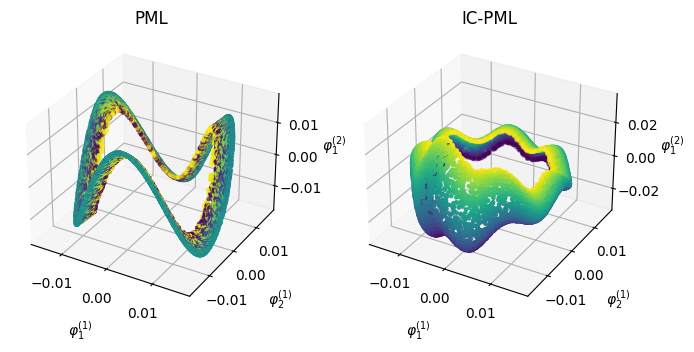

In [5]:
fig = plt.figure(figsize=(8, 16))

ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.scatter(results['phi'][:,results['manifolds'][0][0]], results['phi'][:,results['manifolds'][0][1]], results['phi'][:,results['manifolds'][1][0]], c=samples[:,2], s=5)
ax1.set_title('PML')
ax1.set_xlabel(r'$\varphi_1^{(1)}$', labelpad=10, rotation=0)
ax1.set_ylabel(r'$\varphi_2^{(1)}$', labelpad=10, rotation=0)
ax1.set_zlabel(r'$\varphi_1^{(2)}$', labelpad=5, rotation=0)
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)

ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.scatter(ind_results['phi'][:,new_manifolds[0][0]], ind_results['phi'][:,new_manifolds[0][1]], ind_results['phi'][:,new_manifolds[1][0]], c=samples[:,2], s=5)
ax2.set_title('IC-PML')
ax2.set_xlabel(r'$\varphi_1^{(1)}$', labelpad=10, rotation=0)
ax2.set_ylabel(r'$\varphi_2^{(1)}$', labelpad=10, rotation=0)
ax2.set_zlabel(r'$\varphi_1^{(2)}$', labelpad=5, rotation=0)
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False) 

Text(0.5, 0.92, 'Warped Cylinder')

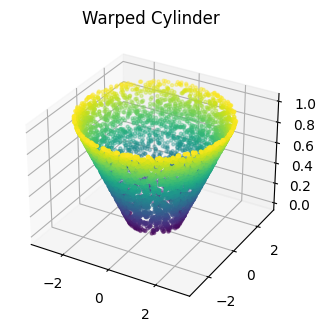

In [6]:
d = 2
surface = lambda theta, z: np.array(((d*z+1)* np.cos(2 * np.pi * theta), 
                            (d*z+1) * np.sin(2 * np.pi * theta),
                            z))    
w_cylinder, *_ = r_surface(5000, surface, 0, 1, 0, 1)
w_cylinder = w_cylinder.T
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(w_cylinder[:,0], w_cylinder[:,1], w_cylinder[:,2], c=w_cylinder[:,2], s=5)
ax.set_title('Warped Cylinder')

[================    ] 80%
Manifolds...
Manifold #1 [ 1  4  7 12 30]
Manifold #2 [ 2  3  6 11 25 43]


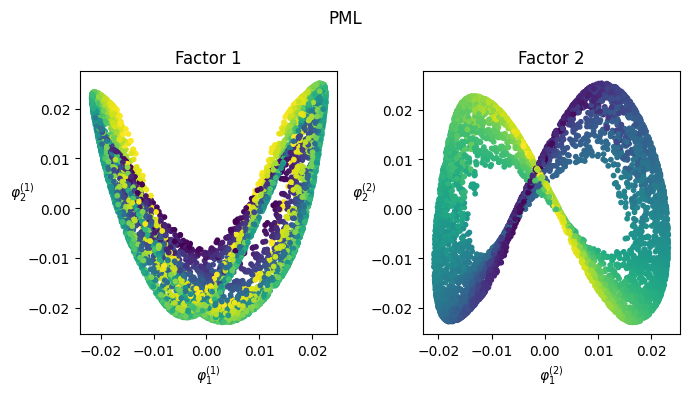

In [7]:
# M_1 and M_2 are switched because phi_1 belongs to the S^1 (warped) factor, not the [0,1] (base) factor
base_fact = factorize(w_cylinder, sigma=0.5, n_factors = 2, sim_crit=0.6, eig_crit=2.0, n_eigenvectors=50)
plot, axes = plt.subplots(1,2, figsize = (7,4))
axes[0].scatter(base_fact["phi"][:,base_fact["manifolds"][1][0]], base_fact["phi"][:,base_fact["manifolds"][1][1]], c = w_cylinder[:,2], s=10)
axes[1].scatter(base_fact["phi"][:,base_fact["manifolds"][0][0]], base_fact["phi"][:,base_fact["manifolds"][0][1]], c = w_cylinder[:,0], s=10)
axes[0].set_title('Factor 1')
axes[1].set_title('Factor 2')
plot.suptitle('PML')
axes[0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
axes[0].set_ylabel(r'$\varphi_2^{(1)}$', rotation=0)
axes[1].set_xlabel(r'$\varphi_1^{(2)}$', rotation=0)
axes[1].set_ylabel(r'$\varphi_2^{(2)}$', rotation=0)
plot.tight_layout()

  0%|          | 0/8 [00:00<?, ?it/s]

[================    ] 80%
Manifolds...
Manifold #1 [1 2 4 5 6]
Manifold #2 [ 3  7 10]
[[1, 2, 6, 5], [7, 3]]


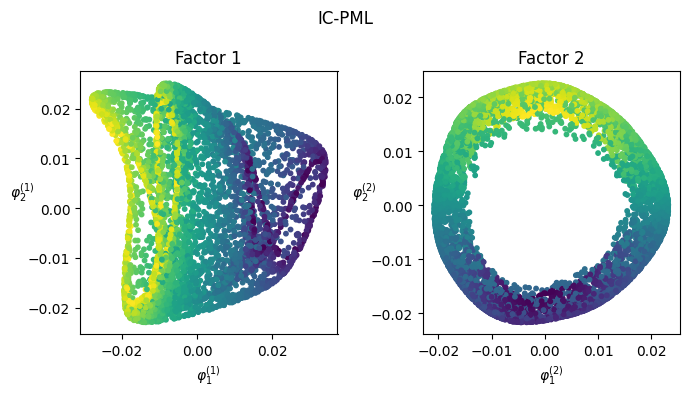

In [8]:
warped_ind_fact = ic_pml(w_cylinder, zeta = 0.02, sigma=0.5,
                                        dim = 2, sim_crit=0.6, eig_crit=2.0,
                                        n_eigenvectors=50, n_coords=25, n_ind_coords=10)
(w_ind_fact, w_new_manifolds, w_ind_coords) = warped_ind_fact
plot, axes = plt.subplots(1,2, figsize = (7,4))
axes[0].scatter(w_ind_fact["phi"][:,w_new_manifolds[1][0]],
                w_ind_fact["phi"][:,w_new_manifolds[1][1]], c = w_cylinder[:,2], s=10)
axes[1].scatter(w_ind_fact["phi"][:,w_new_manifolds[0][0]],
                w_ind_fact["phi"][:,w_new_manifolds[0][1]], c = w_cylinder[:,0], s=10)
axes[0].set_title('Factor 1')
axes[1].set_title('Factor 2')
axes[0].set_xlabel(r'$\varphi_1^{(1)}$', rotation=0)
axes[0].set_ylabel(r'$\varphi_2^{(1)}$', rotation=0)
axes[1].set_xlabel(r'$\varphi_1^{(2)}$', rotation=0)
axes[1].set_ylabel(r'$\varphi_2^{(2)}$', rotation=0)
plot.suptitle('IC-PML')
plot.tight_layout()

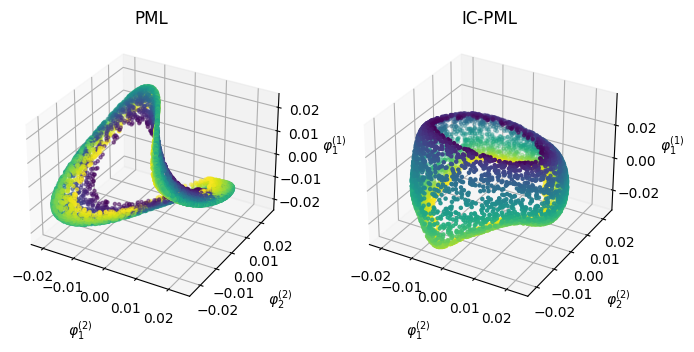

In [9]:
fig = plt.figure(figsize=(8, 16))

ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.scatter(base_fact['phi'][:,base_fact['manifolds'][0][0]], base_fact['phi'][:,base_fact['manifolds'][0][1]], base_fact['phi'][:,base_fact['manifolds'][1][0]], c=w_cylinder[:,2],s=5)
ax1.set_title('PML')
ax1.set_xlabel(r'$\varphi_1^{(2)}$', labelpad=10, rotation=0)
ax1.set_ylabel(r'$\varphi_2^{(2)}$', labelpad=10, rotation=0)
ax1.set_zlabel(r'$\varphi_1^{(1)}$', labelpad=5, rotation=0)
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)

ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.scatter(w_ind_fact['phi'][:,w_new_manifolds[0][0]], w_ind_fact['phi'][:,w_new_manifolds[0][1]], w_ind_fact['phi'][:,w_new_manifolds[1][0]], c=w_cylinder[:,2],s=5)
ax2.set_title('IC-PML')
ax2.set_xlabel(r'$\varphi_1^{(2)}$', labelpad=10, rotation=0)
ax2.set_ylabel(r'$\varphi_2^{(2)}$', labelpad=10, rotation=0)
ax2.set_zlabel(r'$\varphi_1^{(1)}$', labelpad=5, rotation=0)
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)